#### ```Importing Necessary Libraries```

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier

#### ```Loading the dataset and splitting into Train and Test sets```<br> 
##### We have used MetaboAnalyst to find the best features for the dataset using predictive_variance > 1. The dataset is then split into Train and Test sets.

In [2]:
# importing the 2nd sheet from the excel file TumorVsNAT_Metabolomics_Tissue.xlsx named as negative
negative_df = pd.read_excel(
    '../dataset/TumorVsNAT_Metabolomics_Tissue.xlsx', sheet_name='Negative')
# making the fist row as the column header
negative_df.columns = negative_df.iloc[0]
negative_df = negative_df[1:]
print(negative_df.shape)
negative_df.head()

(1378, 32)


,Class,Tumor,Tumor,NAT,Tumor,Tumor,Tumor,Tumor,NAT,Tumor,...,NAT,Tumor,NAT,Tumor,Tumor,NAT,Tumor,Tumor,NAT,NAT
1,MB_1,4607766.521329,9628120.902191,7824878.181526,1135798.004792,5837771.762511,12953790.320535,13081629.764095,4025478.757111,12964550.167404,...,11455043.74695,12433381.668787,12977628.164167,7183151.305047,10491179.450834,9454027.346825,9054566.197321,2441511.813587,11322466.005314,2970068.425688
2,MB_2,4081430.305285,6605479.272243,1211856.61207,3602347.411082,7939803.586037,4444481.096285,6582823.099244,8264197.046616,5137959.448838,...,5308899.784041,11667448.452235,7304780.735231,8212390.563877,8016756.441982,10140499.525373,2878774.152414,15246326.992798,9548978.528288,10117676.623793
3,MB_3,20448930.645811,18488378.385889,19440158.410004,24289212.795935,68038156.615661,46533891.783735,8549495.683676,14514750.13183,10362361.847322,...,42419135.787971,17255850.625775,8406171.431232,8739610.396054,9678319.755449,101319627.120413,23529366.628332,10974900.317516,30340771.056324,14018424.627491
4,MB_4,7130075.063141,5370520.355939,10151942.228064,9179114.675876,10656050.564913,10483043.39533,14937947.377755,10123348.459984,12882586.862359,...,4313739.247432,3942854.3176,4506829.948299,8593382.389242,8400252.801416,11430792.730281,13575506.462289,1167924.295275,14679321.31008,3864123.123504
5,MB_5,15487872.289505,2395967.977354,5150316.529332,6191025.012966,6421967.659694,10099967.451989,6138653.786331,692951.93803,7064505.507381,...,7270087.50341,14724690.482057,3859580.828766,8819380.442754,8093862.136422,4910611.709647,7789008.920726,8457480.651511,12613511.221822,8075314.373802


In [3]:
# converting the dataset into a csv file
negative_df.to_csv(
    '../dataset/TumorVsNAT_Metabolomics_Tissue_negative.csv', index=False)

In [4]:
# loading the oplsda data file
oplsda_df = pd.read_csv('../dataset/oplsda_negative_TumVSNat.csv')
print(oplsda_df.shape)
oplsda_df.head()

(1378, 3)


,Unnamed: 0,V1,V2
0,MB_428,4.093230,0.687132
1,MB_1069,2.974899,0.636051
2,MB_233,2.970576,0.500848
3,MB_462,2.940483,0.475441
4,MB_904,2.890950,0.397201


In [5]:
# selecting top metabolites based on the predictive variance score
top_metabolites_data = oplsda_df[oplsda_df['V1'] > 1]
top_metabolites = top_metabolites_data['Unnamed: 0'].tolist()
print(len(top_metabolites))

451


In [6]:
# filter our original data to include only these metabolites
filtered_data = negative_df[negative_df['Class'].isin(top_metabolites)]
print(filtered_data.shape)
filtered_data.head()

(451, 32)


,Class,Tumor,Tumor,NAT,Tumor,Tumor,Tumor,Tumor,NAT,Tumor,...,NAT,Tumor,NAT,Tumor,Tumor,NAT,Tumor,Tumor,NAT,NAT
5,MB_5,15487872.289505,2395967.977354,5150316.529332,6191025.012966,6421967.659694,10099967.451989,6138653.786331,692951.93803,7064505.507381,...,7270087.50341,14724690.482057,3859580.828766,8819380.442754,8093862.136422,4910611.709647,7789008.920726,8457480.651511,12613511.221822,8075314.373802
6,MB_6,34629730.933732,24583214.041831,15680194.200401,3226635.324351,21043288.463362,22067757.793801,32840869.061058,36791477.58758,7213336.649245,...,35713054.004577,16357296.410225,22256263.949013,20233071.494208,32847726.300004,28866723.103338,31944810.0683,21700846.590337,37929743.049279,29995177.649523
7,MB_7,17893770.870951,19393730.671258,16706508.756427,12836828.030999,8876133.827806,19134605.134732,17026461.277137,12879461.606422,15409516.262616,...,5934816.464812,8541684.871598,11070393.52471,8947846.819381,25656065.310941,7494389.424803,10864187.286176,13281364.611432,7314005.832783,11101703.92413
9,MB_9,6552677.104375,17099270.464935,10577120.951391,16181319.782623,11031322.043079,5595440.949924,14443968.46086,3862751.822254,5178496.044547,...,6818801.69642,6619412.502427,22183170.207135,6570333.611477,6794347.784644,6916156.357824,6109015.433585,6340473.68522,17180553.444081,19166381.314201
15,MB_15,5038864.180209,3942026.883167,5312781.255174,5568268.336181,4112491.940828,5152374.765254,4129741.930367,5121232.688521,3412861.428034,...,5589770.062693,4860581.044307,1299069.335463,2825708.161986,4670503.284099,3605956.508472,5362191.93361,4143809.323715,1760010.762676,2951870.382534


In [ ]:
# making a matrix of the data
data_transposed = filtered_data.T
data_transposed.reset_index(inplace=True)
data_transposed.columns = data_transposed.iloc[0]
data_transposed = data_transposed[1:]
print(data_transposed.shape)
data_transposed.head()

(31, 452)


,Class,MB_5,MB_6,MB_7,MB_9,MB_15,MB_16,MB_17,MB_18,MB_19,...,MB_1344,MB_1346,MB_1349,MB_1354,MB_1355,MB_1356,MB_1366,MB_1370,MB_1372,MB_1373
1,Tumor,15487872.289505,34629730.933732,17893770.870951,6552677.104375,5038864.180209,58718766.8043,116930997.685704,196632861.099754,311257668.783407,...,9606859.494544,6265924.326665,176705613.700709,18363414.546057,21696005.386636,6049924.584379,3170620.95733,17517438.271388,21236314.383816,10437713.510977
2,Tumor,2395967.977354,24583214.041831,19393730.671258,17099270.464935,3942026.883167,76386830.390564,254492933.937803,73155594.683035,194921375.045952,...,5240979.994079,11686101.076598,28828382.528221,6066756.8292,9786402.301499,2648171.410091,4453452.747255,32154948.562052,10012199.324568,28667285.548962
3,NAT,5150316.529332,15680194.200401,16706508.756427,10577120.951391,5312781.255174,74376065.402376,6117107.278607,177022006.097285,214032969.710498,...,12698648.08448,6434475.658942,118635263.343915,10991307.915378,10331986.981203,4351881.366702,4691431.653285,53461069.421858,16520162.421173,19576978.344639
4,Tumor,6191025.012966,3226635.324351,12836828.030999,16181319.782623,5568268.336181,82380101.603447,98691729.096242,239499106.783543,349975466.21261,...,13466035.674668,10977177.400771,134411797.042634,8472428.305491,6212145.578002,3924687.954856,3636609.999584,16010428.007328,36041356.603022,21517730.159449
5,Tumor,6421967.659694,21043288.463362,8876133.827806,11031322.043079,4112491.940828,137799177.466039,211261923.251918,267150454.246627,602843535.705987,...,10563399.318455,9159312.994795,60029810.833006,75523525.125552,3637685.478142,4995740.919995,542863.210338,35964506.665871,50104314.049032,33229205.08614


In [8]:
# convert the class labels to binary numpy array
y = np.where(data_transposed['Class'] == 'Tumor', 1, -1)
# split the data into training and testing
X = data_transposed.drop(['Class'], axis=1)
print(y)
X.head()

[ 1  1 -1  1  1  1  1 -1  1  1  1  1 -1  1  1 -1  1 -1  1 -1  1 -1  1 -1
  1  1 -1  1  1 -1 -1]


,MB_5,MB_6,MB_7,MB_9,MB_15,MB_16,MB_17,MB_18,MB_19,MB_22,...,MB_1344,MB_1346,MB_1349,MB_1354,MB_1355,MB_1356,MB_1366,MB_1370,MB_1372,MB_1373
1,15487872.289505,34629730.933732,17893770.870951,6552677.104375,5038864.180209,58718766.8043,116930997.685704,196632861.099754,311257668.783407,58287852.650139,...,9606859.494544,6265924.326665,176705613.700709,18363414.546057,21696005.386636,6049924.584379,3170620.95733,17517438.271388,21236314.383816,10437713.510977
2,2395967.977354,24583214.041831,19393730.671258,17099270.464935,3942026.883167,76386830.390564,254492933.937803,73155594.683035,194921375.045952,38988483.501239,...,5240979.994079,11686101.076598,28828382.528221,6066756.8292,9786402.301499,2648171.410091,4453452.747255,32154948.562052,10012199.324568,28667285.548962
3,5150316.529332,15680194.200401,16706508.756427,10577120.951391,5312781.255174,74376065.402376,6117107.278607,177022006.097285,214032969.710498,307534335.661113,...,12698648.08448,6434475.658942,118635263.343915,10991307.915378,10331986.981203,4351881.366702,4691431.653285,53461069.421858,16520162.421173,19576978.344639
4,6191025.012966,3226635.324351,12836828.030999,16181319.782623,5568268.336181,82380101.603447,98691729.096242,239499106.783543,349975466.21261,31272978.876961,...,13466035.674668,10977177.400771,134411797.042634,8472428.305491,6212145.578002,3924687.954856,3636609.999584,16010428.007328,36041356.603022,21517730.159449
5,6421967.659694,21043288.463362,8876133.827806,11031322.043079,4112491.940828,137799177.466039,211261923.251918,267150454.246627,602843535.705987,103164500.156987,...,10563399.318455,9159312.994795,60029810.833006,75523525.125552,3637685.478142,4995740.919995,542863.210338,35964506.665871,50104314.049032,33229205.08614


In [ ]:
# normalize the data using standard scalar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,MB_5,MB_6,MB_7,MB_9,MB_15,MB_16,MB_17,MB_18,MB_19,MB_22,...,MB_1344,MB_1346,MB_1349,MB_1354,MB_1355,MB_1356,MB_1366,MB_1370,MB_1372,MB_1373
0,2.195162,0.992447,0.826745,-0.811949,0.554038,-0.754143,0.073213,1.461977,0.744111,-0.249538,...,-0.084200,-0.248880,1.374489,0.044047,0.414478,0.422277,-0.734957,-0.210129,-0.600149,-0.592954
1,-1.366570,-0.022604,1.067535,1.399152,-0.363598,-0.548698,1.847533,-0.383387,0.016305,-0.596752,...,-1.025794,-0.118405,-1.179301,-0.843488,-0.620471,-2.073206,0.243030,0.938641,-1.089700,0.197214
2,-0.617233,-0.922122,0.636152,0.031779,0.783203,-0.572079,-1.356101,1.168893,0.135868,4.234638,...,0.582611,-0.244822,0.371634,-0.488049,-0.573060,-0.823386,0.424457,2.610772,-0.805848,-0.196809
3,-0.334102,-2.180370,0.014948,1.206703,0.996949,-0.479008,-0.162043,2.102612,0.986331,-0.735561,...,0.748114,-0.135470,0.644089,-0.669854,-0.931076,-1.136770,-0.379703,-0.328401,0.045588,-0.112686
4,-0.271272,-0.380261,-0.620866,0.127002,-0.220984,0.165407,1.289925,2.515861,2.568285,0.557835,...,0.122099,-0.179230,-0.640463,4.169688,-1.154797,-0.351059,-2.738271,1.237620,0.658958,0.394952


In [10]:
# split into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

#### ``` Testing with different models```

#### ```Logistic Regression model with Elastic Net regularization```<br> 
##### Using this we will find the top 25 features.

Selected top 25 features using SelectFromModel:
Index(['MB_5', 'MB_56', 'MB_69', 'MB_112', 'MB_157', 'MB_159', 'MB_274',
       'MB_428', 'MB_437', 'MB_462', 'MB_579', 'MB_607', 'MB_611', 'MB_642',
       'MB_733', 'MB_904', 'MB_938', 'MB_948', 'MB_995', 'MB_1018', 'MB_1069',
       'MB_1213', 'MB_1258', 'MB_1323', 'MB_1329'],
      dtype='object', name=0)
(24, 25) (7, 25)
Mean cross-validation accuracy (train set): 0.838
Accuracy with top 25 features: 0.5714285714285714
Confusion Matrix:


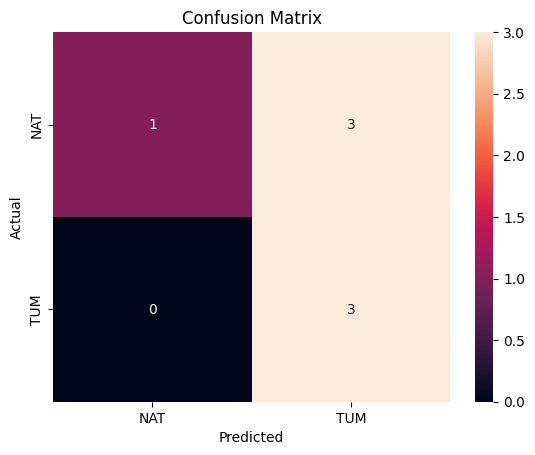

AUC score with top 25 features: 0.6666666666666666


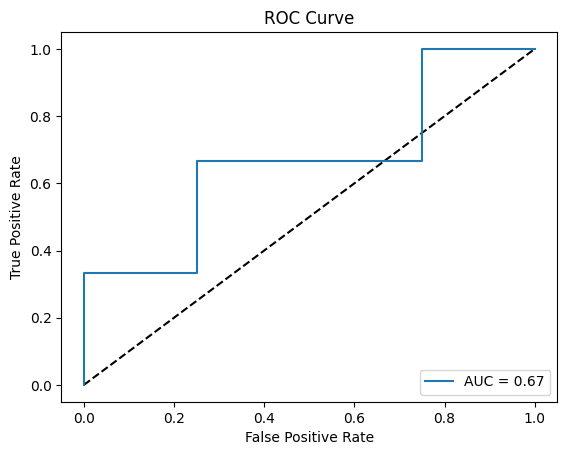

In [11]:
# Logistic regression model with Elastic Net regularization
log_reg = LogisticRegressionCV(
    Cs=10,                    # Number of different regularization strengths to try
    penalty='elasticnet',    # Elastic Net penalty
    solver='saga',           # SAGA solver supports Elastic Net
    l1_ratios=[0.1, 0.5, 0.9],    # Mix of L1 and L2 regularization
    cv=5,                    # 3-fold cross-validation
    max_iter=5000           # Increase max iterations
)

# Fit the model to the training data
log_reg.fit(X_train, y_train)

# Use SelectFromModel to select the top 25 features
select_model = SelectFromModel(estimator=log_reg, max_features=25)
select_model.fit(X_train, y_train)

# Get the indices of the selected features
selected_features_logreg = X_train.columns[select_model.get_support()]

# Display the top 25 features
print("Selected top 25 features using SelectFromModel:")
print(selected_features_logreg)

# Transform the dataset to only include selected features
X_train_selected = select_model.transform(X_train)
X_test_selected = select_model.transform(X_test)
print(X_train_selected.shape, X_test_selected.shape)

# Retrain the model on the reduced feature set
log_reg.fit(X_train_selected, y_train)

# Print cross-validation accuracy scores
print("Mean cross-validation accuracy (train set):",
      np.mean(log_reg.scores_[1]))

# Make predictions on the test set using the reduced feature set
y_pred = log_reg.predict(X_test_selected)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with top 25 features:", accuracy)

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['NAT', 'TUM'], yticklabels=['NAT', 'TUM'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Generate ROC curve
y_pred_prob = log_reg.predict_proba(X_test_selected)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# Calculate AUC score
auc = roc_auc_score(y_test, y_pred_prob)
print("AUC score with top 25 features:", auc)
# Plot the ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

#### `Random Forest Model`

Best parameters found: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Top 25 features by importance: ['MB_428' 'MB_109' 'MB_32' 'MB_1141' 'MB_487' 'MB_1302' 'MB_782' 'MB_1018'
 'MB_661' 'MB_250' 'MB_22' 'MB_283' 'MB_462' 'MB_731' 'MB_1213' 'MB_402'
 'MB_61' 'MB_1066' 'MB_1166' 'MB_689' 'MB_507' 'MB_969' 'MB_404' 'MB_1229'
 'MB_1329']
Mean cross-validation accuracy (Train set): 0.8699999999999999
Accuracy with top 25 features (Test set): 0.7142857142857143
Confusion Matrix:


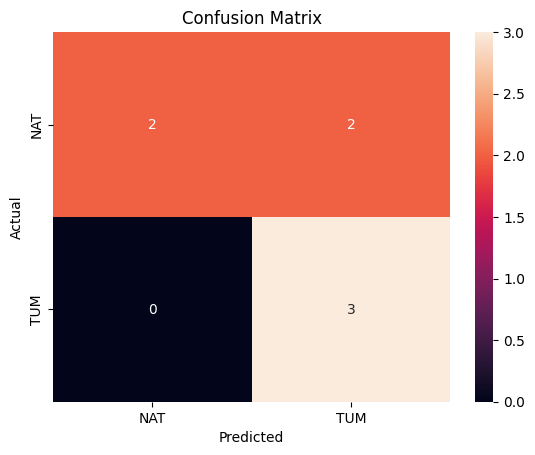

AUC: 0.875


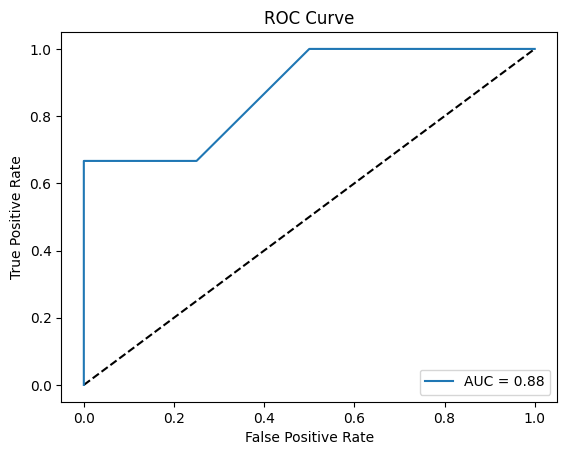

In [12]:
# The Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 500],   # Different numbers of trees
    'max_depth': [10, 20, None],       # Maximum depth of the trees
    'min_samples_split': [2, 5, 10]    # Minimum samples required to split an internal node
}

grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters from the grid search
print("Best parameters found:", grid_search.best_params_)

# Train Random Forest with the best parameters on the full training dataset
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)

# Get feature importances
importances = best_rf_model.feature_importances_

# Create a DataFrame to hold feature names and their importance
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,  # Assuming X is a DataFrame
    'Importance': importances
})

# Sort the DataFrame by importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select the top 25 features
selected_features_rf_op = feature_importance_df.head(25)['Feature'].values

# Print the top 25 features
print(f"Top 25 features by importance: {selected_features_rf_op}")


# Retrain the model with the modified dataset with only the top 25 features
X_train_selected = X_train[selected_features_rf_op]
X_test_selected = X_test[selected_features_rf_op]
best_rf_model = RandomForestClassifier(**grid_search.best_params_, random_state=42)
best_rf_model.fit(X_train_selected, y_train)

# Cross-validation accuracy on the training set
cv_scores = cross_val_score(best_rf_model, X_train_selected, y_train, cv=5)
print("Mean cross-validation accuracy (Train set):", np.mean(cv_scores))

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test_selected)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with top 25 features (Test set):", accuracy)

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['NAT', 'TUM'], yticklabels=['NAT', 'TUM'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Get the predicted probabilities
y_pred_prob = best_rf_model.predict_proba(X_test_selected)[:,1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# Calculate the AUC
auc = roc_auc_score(y_test, y_pred_prob)
print("AUC:", auc)
# Plot the ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()



#### ```SVM model with L1 regularization```<br>
##### We will find the top features as per L1 regularization.

Selected features by L1 regularization:
Index(['MB_5', 'MB_32', 'MB_61', 'MB_112', 'MB_344', 'MB_428', 'MB_462',
       'MB_469', 'MB_485', 'MB_579', 'MB_710', 'MB_786', 'MB_938', 'MB_948',
       'MB_956', 'MB_995', 'MB_1018', 'MB_1110', 'MB_1132', 'MB_1213',
       'MB_1258', 'MB_1323', 'MB_1370'],
      dtype='object', name=0)
Mean cross-validation accuracy (Train set): 0.9199999999999999
Accuracy with selected features by L1 (Test set): 1.0
Confusion Matrix:


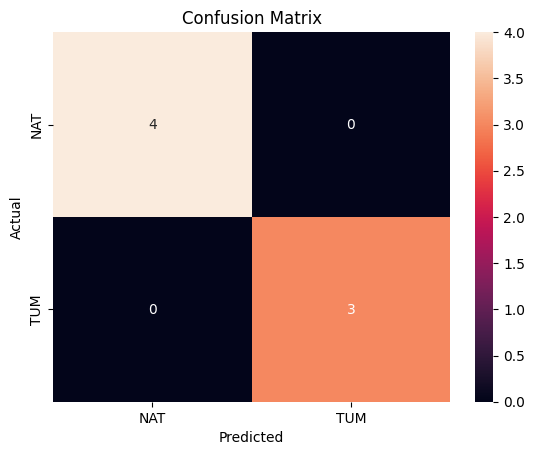

AUC: 1.0


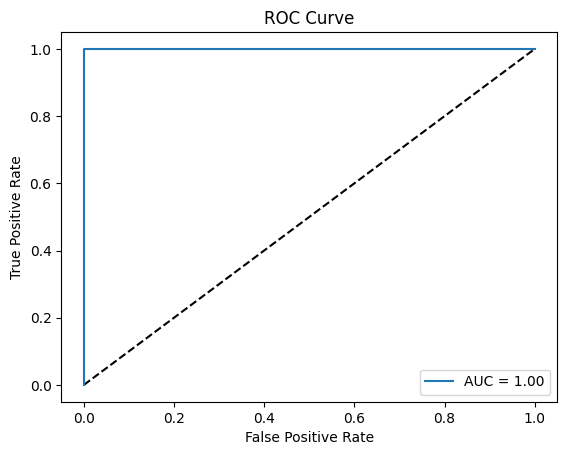

In [13]:
# The SVM model with L1 regularization and dual=False for small datasets
svm_l1_model = LinearSVC(penalty='l1', dual=False, random_state=42, max_iter=10000)

# Fit the model on the training data
svm_l1_model.fit(X_train, y_train)

# Select features with non-zero coefficients (L1 regularization performs feature selection)
selector = SelectFromModel(svm_l1_model, max_features=25, prefit=True)
X_train_selected = selector.transform(X_train.values)
X_test_selected = selector.transform(X_test.values)

# Display the selected features
selected_features_svm_l1 = X_train.columns[selector.get_support()]
print("Selected features by L1 regularization:")
print(selected_features_svm_l1)

# Cross-validation accuracy on the training set
cv_scores = cross_val_score(svm_l1_model, X_train_selected, y_train, cv=5)
print("Mean cross-validation accuracy (Train set):", np.mean(cv_scores))

svm_l1_model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = svm_l1_model.predict(X_test_selected)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with selected features by L1 (Test set):", accuracy)

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['NAT', 'TUM'], yticklabels=['NAT', 'TUM'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Get the predicted probabilities
y_pred_prob = svm_l1_model.decision_function(X_test_selected)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC
auc = roc_auc_score(y_test, y_pred_prob)
print("AUC:", auc)

# Plot the ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


#### ```SVM model with Recursive Feature Elimination``` <br>
##### Using this we will find the top 25 features.

Selected top 25 features by RFE:
Index(['MB_5', 'MB_32', 'MB_69', 'MB_112', 'MB_157', 'MB_159', 'MB_428',
       'MB_437', 'MB_462', 'MB_607', 'MB_611', 'MB_642', 'MB_710', 'MB_724',
       'MB_786', 'MB_904', 'MB_938', 'MB_948', 'MB_1053', 'MB_1166', 'MB_1213',
       'MB_1258', 'MB_1323', 'MB_1329', 'MB_1370'],
      dtype='object', name=0)
(24, 25) (7, 25)
Mean cross-validation accuracy (Train set): 1.0
Accuracy with top 25 features: (Test set) 0.7142857142857143
Confusion Matrix:


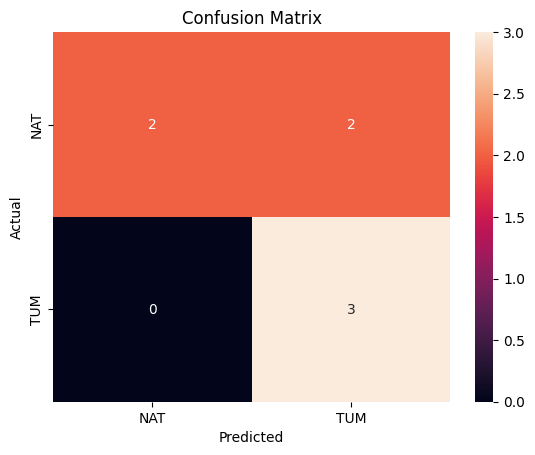

AUC: 0.9166666666666666


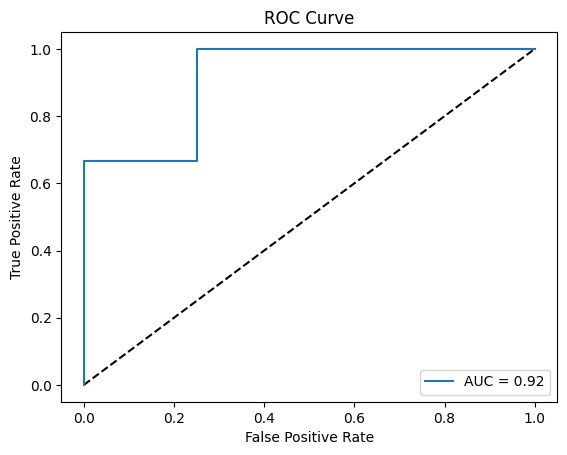

In [14]:
# The SVM model
svm_model = SVC(kernel='linear', random_state=42)

# Apply Recursive Feature Elimination (RFE) to select top 25 features
rfe = RFE(estimator=svm_model, n_features_to_select=25, step=1)
rfe.fit(X_train, y_train)

# Get the ranking of the features and the selected features
selected_features_svm_rfe = X_train.columns[rfe.support_]
ranking = rfe.ranking_

# Display the top 25 features selected by RFE
print("Selected top 25 features by RFE:")
print(selected_features_svm_rfe)

# Make predictions using the model on the test set with the selected features
X_train_selected = rfe.transform(X_train)
X_test_selected = rfe.transform(X_test)

print(X_train_selected.shape, X_test_selected.shape)
# Fit the SVM model with the selected features
svm_model.fit(X_train_selected, y_train)

# Cross-validation accuracy on the training set
cv_scores = cross_val_score(svm_model, X_train_selected, y_train, cv=5)
print("Mean cross-validation accuracy (Train set):", np.mean(cv_scores))

# Make predictions on the test set
y_pred = svm_model.predict(X_test_selected)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with top 25 features: (Test set)", accuracy)

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['NAT', 'TUM'], yticklabels=['NAT', 'TUM'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Get the predicted probabilities
y_pred_prob = svm_model.decision_function(X_test_selected)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC
auc = roc_auc_score(y_test, y_pred_prob)
print("AUC:", auc)

# Plot the ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

#### `Results`

In [15]:
# Convert Series to lists
selected_features_logreg = selected_features_logreg.tolist()
selected_features_rf_op = selected_features_rf_op.tolist()
selected_features_svm_l1 = selected_features_svm_l1.tolist()
selected_features_svm_rfe = selected_features_svm_rfe.tolist()

# Find the maximum length of the arrays
max_length = max(len(selected_features_logreg), len(selected_features_rf_op), len(selected_features_svm_l1), len(selected_features_svm_rfe))

# Pad the arrays with None to make them the same length
selected_features_logreg += [None] * (max_length - len(selected_features_logreg))
selected_features_rf_op += [None] * (max_length - len(selected_features_rf_op))
selected_features_svm_l1 += [None] * (max_length - len(selected_features_svm_l1))
selected_features_svm_rfe += [None] * (max_length - len(selected_features_svm_rfe))

# Create the DataFrame
selected_features = pd.DataFrame({
    'Logistic Regression': selected_features_logreg,
    'Random Forest': selected_features_rf_op,
    'SVM L1': selected_features_svm_l1,
    'SVM RFE': selected_features_svm_rfe
})

# Save to Excel
selected_features.to_excel('../results/selected_features_tumVsnat_negative.xlsx', index=False)